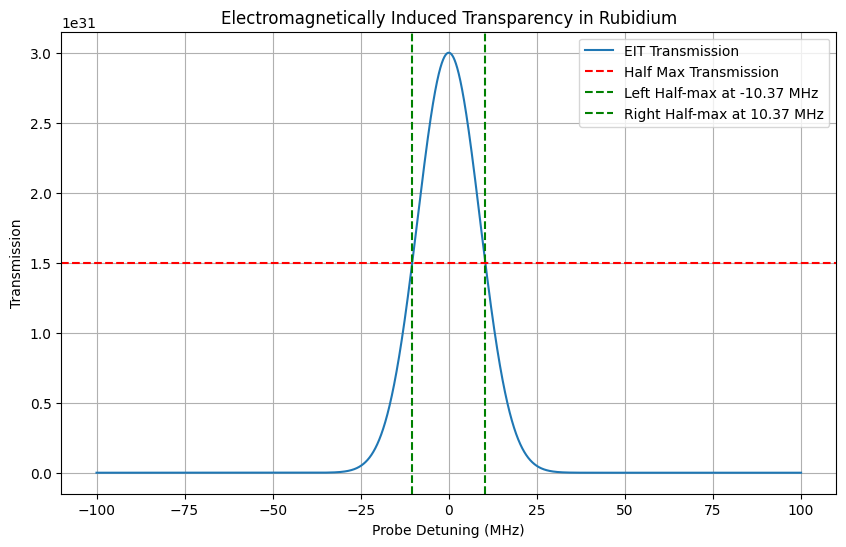

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 상수 정의
gamma_S_P = 2 * np.pi * 6  # 5P1/2 감쇠율, MHz
gamma_P_D = 2 * np.pi * 0.1 # 41D3/2 감쇠율, MHz
Omega_p = 2 * np.pi * 1  # 프로브 레이저의 Rabi 주파수, MHz
Omega_c = 2 * np.pi * 6  # 제어 레이저의 Rabi 주파수, MHz
Delta_p = np.linspace(-100, 100, 10000)  # 프로브 레이저의 디튜닝 범위

# 블로흐 방정식 (실수와 허수 분리)
def bloch_equations(rho, t, Delta_p, gamma_S_P, gamma_P_D, Omega_p, Omega_c):
    rho11, rho22, rho33, Re_rho12, Im_rho12, Re_rho13, Im_rho13, Re_rho23, Im_rho23 = rho
    drho11_dt = -gamma_S_P * rho11 + 2 * Omega_p * Im_rho12
    drho22_dt = gamma_S_P * rho11 - 2 * Omega_p * Im_rho12 - 2 * Omega_c * Im_rho23
    drho33_dt = 2 * Omega_c * Im_rho23 - gamma_P_D * rho33
    dRe_rho12_dt = -0.5 * gamma_S_P * Re_rho12 + Delta_p * Im_rho12
    dIm_rho12_dt = -0.5 * gamma_S_P * Im_rho12 - Delta_p * Re_rho12 + Omega_p * (rho22 - rho11)
    dRe_rho13_dt = -0.5 * gamma_P_D * Re_rho13
    dIm_rho13_dt = Delta_p * Re_rho13
    dRe_rho23_dt = -0.5 * gamma_P_D * Re_rho23 + Delta_p * Im_rho23
    dIm_rho23_dt = -0.5 * gamma_P_D * Im_rho23 - Delta_p * Re_rho23 + Omega_c * (rho33 - rho22)
    return [drho11_dt, drho22_dt, drho33_dt, dRe_rho12_dt, dIm_rho12_dt, dRe_rho13_dt, dIm_rho13_dt, dRe_rho23_dt, dIm_rho23_dt]

# 초기 조건
rho_initial = [1, 0, 0, 0, 0, 0, 0, 0, 0]  # 모든 원자가 기저 상태에 있음

# ODE 풀이 및 투과율 계산
t = np.linspace(0, 1, 1000)  # 짧은 시간으로 충분
transmission = []
for dp in Delta_p:
    rho_t = odeint(bloch_equations, rho_initial, t, args=(dp, gamma_S_P, gamma_P_D, Omega_p, Omega_c))
    transmission.append(rho_t[-1, 1])  # 투과율 계산 (rho11의 유지 또는 증가를 확인)

# 최대 투과율 및 선폭 계산
max_transmission = max(transmission)
half_max = max_transmission / 2

# 최대치의 절반 값에 해당하는 지점 찾기
indices = np.where(transmission >= half_max)[0]
if indices.size > 0:
    left_idx = indices[0]
    right_idx = indices[-1]
    linewidth = Delta_p[right_idx] - Delta_p[left_idx]

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(Delta_p, transmission, label='EIT Transmission')
    plt.axhline(y=half_max, color='r', linestyle='--', label='Half Max Transmission')
    plt.axvline(x=Delta_p[left_idx], color='g', linestyle='--', label=f'Left Half-max at {Delta_p[left_idx]:.2f} MHz')
    plt.axvline(x=Delta_p[right_idx], color='g', linestyle='--', label=f'Right Half-max at {Delta_p[right_idx]:.2f} MHz')
    plt.xlabel('Probe Detuning (MHz)')
    plt.ylabel('Transmission')
    plt.title('Electromagnetically Induced Transparency in Rubidium')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No points exceed half maximum. Check your transmission calculations and parameters.")


In [1]:
import numpy as np

# 물리 상수
epsilon_0 = 8.85e-12  # 진공의 유전율 (F/m)
c = 299792458  # 빛의 속도 (m/s)
hbar = 1.0545718e-34  # 환산 플랑크 상수 (J·s)

# 레이저 파라미터
P_p = 35e-6  # 프로브 레이저 파워 (W)
P_c = 125e-3  # 제어 레이저 파워 (W)
d = 1e-3  # 레이저 빔 직경 (m)
A = np.pi * (d / 2) ** 2  # 빔 면적 (m²)

# 전기장 계산
E_p = np.sqrt(2 * P_p / (epsilon_0 * c * A))
E_c = np.sqrt(2 * P_c / (epsilon_0 * c * A))

# 전자기 전이 모멘트 (예제 값)
mu = 3.5e-29  # 전이 모멘트 (C·m)

# 라비 주파수 계산
Omega_p = mu * E_p / hbar
Omega_c = mu * E_c / hbar

# 출력
print(f"Probe Rabi frequency (Omega_p): {Omega_p / (2 * np.pi)} MHz")
print(f"Control Rabi frequency (Omega_c): {Omega_c / (2 * np.pi)} MHz")


Probe Rabi frequency (Omega_p): 9681309.73340125 MHz
Control Rabi frequency (Omega_c): 578568918.4594353 MHz


In [8]:
a= 766.700921822 #nm
b= 770.108385049 #nm

print (c/a)
print(b/a)
print(-b/a + c/a)
print(c/(b-a))

391016.1700178585
1.0044443186776173
391015.16557353985
87981127.90315977
